# Preprocessing reaction dataset

This notebook is for preprocessing to get training data of neural network

# Step 1: Preparing for reaction template extraction

This step is preparing all dataset from USPTO which you can download from https://doi.org/10.6084/m9.figshare.5104873.v1.

In [1]:
import pandas as pd

After imported Pandas python library, all reaction dataset; both grants and application in SMILES format will be load into this notebook. Which reading from CSV file by using tab as separator

In [2]:
Grants       = pd.read_csv('1976_Sep2016_USPTOgrants_smiles.rsmi', sep='\t')
Applications = pd.read_csv('2001_Sep2016_USPTOapplications_smiles.rsmi', sep='\t')

/tmp/ipykernel_6702/2011872912.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Grants       = pd.read_csv('1976_Sep2016_USPTOgrants_smiles.rsmi', sep='\t')
/tmp/ipykernel_6702/2011872912.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  Applications = pd.read_csv('2001_Sep2016_USPTOapplications_smiles.rsmi', sep='\t')


Then all reaction from file 1976_Sep2016_USPTOgrants_smiles.rsmi will be show here.

In [3]:
Grants

,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
0,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930836,NaN,1976,NaN,NaN
1,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930836,NaN,1976,NaN,NaN
2,[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S...,US03930836,NaN,1976,NaN,NaN
3,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930839,NaN,1976,NaN,NaN
4,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930839,NaN,1976,NaN,NaN
...,...,...,...,...,...,...
1808932,Br[C:2]1[CH:3]=[CH:4][C:5]2[NH:6][C:7]3[C:12](...,US09450188B2,551,2016,59%,NaN
1808933,Br[C:2]1[CH:7]=[CH:6][C:5]([C:8]2[C:9]3[C:14](...,US09450188B2,556,2016,80%,77.4%
1808934,Br[C:2]1[CH:7]=[CH:6][C:5]([C:8]2[CH:21]=[CH:2...,US09450188B2,574,2016,61%,NaN
1808935,Br[C:2]1[CH:3]=[C:4]([C:8]2[CH:21]=[CH:20][C:1...,US09450188B2,608,2016,70%,69.5%


And reaction from file 2001_Sep2016_USPTOapplications_smiles.rsmi will be show here.

In [4]:
Applications

,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
0,[C:1]([C:5]1[CH:10]=[CH:9][C:8]([OH:11])=[CH:7...,US20010000035A1,7.0,2001,NaN,NaN
1,[Cl-].[Al+3].[Cl-].[Cl-].[Cl:5][CH2:6][CH2:7][...,US20010000038A1,256.0,2001,86%,86.9%
2,[Al+3].[Cl-].[Cl-].[Cl-].[Cl:5][CH2:6][CH2:7][...,US20010000038A1,259.0,2001,95%,NaN
3,[Cl:1][CH2:2][CH2:3][CH2:4][C:5]([C:7]1[CH:12]...,US20010000038A1,285.0,2001,NaN,NaN
4,[Cl:1][CH2:2][CH2:3][CH2:4][C:5]([C:7]1[CH:12]...,US20010000038A1,287.0,2001,100%,100.9%
...,...,...,...,...,...,...
1939248,[NH:1]1[C:9]2[C:4](=[CH:5][CH:6]=[C:7]([NH:10]...,US20160272617A1,2361,2016,NaN,NaN
1939249,[OH:1][CH:2]1[CH2:5][CH:4]([NH:6][C:7]([C:9]2[...,US20160272617A1,2365,2016,NaN,NaN
1939250,C(OC([NH:8][CH2:9][C@H:10]1[CH2:15][CH2:14][C@...,US20160272617A1,2373,2016,NaN,NaN
1939251,[CH:1]1([NH:4][C:5]([C:7]2[CH:12]=[CH:11][C:10...,US20160272617A1,2377,2016,NaN,NaN


Next, both dataset will be concatenate here and since there are some duplicate reaction which are not needed. So all duplicate reaction will be removed.

In [5]:
USPTO = pd.concat([Grants, Applications])
USPTO = USPTO.drop_duplicates(subset=['ReactionSmiles'])
USPTO

,ReactionSmiles,PatentNumber,ParagraphNum,Year,TextMinedYield,CalculatedYield
0,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,US03930836,NaN,1976,NaN,NaN
1,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,US03930836,NaN,1976,NaN,NaN
2,[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S...,US03930836,NaN,1976,NaN,NaN
6,[Cl:1][C:2]1[N:3]=[CH:4][C:5]2[C:10]([CH:11]=1...,US03930837,NaN,1976,NaN,NaN
7,[CH3:1][C:2]1[N+:3]([O-])=[CH:4][C:5]2[C:10]([...,US03930837,NaN,1976,NaN,NaN
...,...,...,...,...,...,...
1939248,[NH:1]1[C:9]2[C:4](=[CH:5][CH:6]=[C:7]([NH:10]...,US20160272617A1,2361,2016,NaN,NaN
1939249,[OH:1][CH:2]1[CH2:5][CH:4]([NH:6][C:7]([C:9]2[...,US20160272617A1,2365,2016,NaN,NaN
1939250,C(OC([NH:8][CH2:9][C@H:10]1[CH2:15][CH2:14][C@...,US20160272617A1,2373,2016,NaN,NaN
1939251,[CH:1]1([NH:4][C:5]([C:7]2[CH:12]=[CH:11][C:10...,US20160272617A1,2377,2016,NaN,NaN


Now after duplicated reaction removed, the reaction need to split into reactants, spectators, and products respectively.

In [6]:
Split_SMILES = USPTO['ReactionSmiles'].str.split('>', expand=True)
USPTO['Reactants']  = Split_SMILES[0]
USPTO['Spectators'] = Split_SMILES[1]
USPTO['Products']   = Split_SMILES[2]

Then, resetting index and select only reactants, products, and spectators.

In [7]:
USPTO = USPTO.reset_index().rename(columns={'index':'Id'})
USPTO = USPTO[['Id', 'Reactants', 'Spectators', 'Products']]
USPTO

,Id,Reactants,Spectators,Products
0,0,[Br:1][CH2:2][CH2:3][OH:4].[CH2:5]([S:7](Cl)(=...,C(N(CC)CC)C,[CH2:5]([S:7]([O:4][CH2:3][CH2:2][Br:1])(=[O:9...
1,1,[Br:1][CH2:2][CH2:3][CH2:4][OH:5].[CH3:6][S:7]...,C(N(CC)CC)C,[CH3:6][S:7]([O:5][CH2:4][CH2:3][CH2:2][Br:1])...
2,2,[CH2:1]([Cl:4])[CH2:2][OH:3].CCOCC.[CH2:10]([S...,C(N(CC)CC)C,[CH2:10]([S:14]([O:3][CH2:2][CH2:1][Cl:4])(=[O...
3,6,[Cl:1][C:2]1[N:3]=[CH:4][C:5]2[C:10]([CH:11]=1...,C(O)(=O)C.[Fe],[Cl:1][C:2]1[N:3]=[CH:4][C:5]2[C:10]([CH:11]=1...
4,7,[CH3:1][C:2]1[N+:3]([O-])=[CH:4][C:5]2[C:10]([...,,[Cl:18][C:4]1[C:5]2[C:10](=[C:9]([N+:12]([O-:1...
...,...,...,...,...
1484436,1939248,[NH:1]1[C:9]2[C:4](=[CH:5][CH:6]=[C:7]([NH:10]...,O1CCOCC1.CO,[ClH:57].[NH2:48][CH2:47][C@H:44]1[CH2:45][CH2...
1484437,1939249,[OH:1][CH:2]1[CH2:5][CH:4]([NH:6][C:7]([C:9]2[...,O1CCOCC1.CO,[ClH:54].[NH2:45][CH2:44][C@H:41]1[CH2:42][CH2...
1484438,1939250,C(OC([NH:8][CH2:9][C@H:10]1[CH2:15][CH2:14][C@...,O1CCOCC1,[ClH:67].[NH2:8][CH2:9][C@H:10]1[CH2:15][CH2:1...
1484439,1939251,[CH:1]1([NH:4][C:5]([C:7]2[CH:12]=[CH:11][C:10...,O1CCOCC1,[ClH:52].[NH2:43][CH2:42][C@H:39]1[CH2:38][CH2...


Finally, all reaction dataset will be save into .json file

In [8]:
USPTO.to_json('USPTO_Reaction.json', orient='records')

# Part 2: Extract reaction template

In this step all reaction which is stored in JSON file will be extracted into reaction template here

Since the number of dataset is large, to save the processing time, the parallel processing is necessary in this step.

Now import parallel processing library for this step and also import json tools for processing this file

In [9]:
import json
from joblib import Parallel, delayed

Import Extract_from_Reaction function from ReactionTemplateExtractor.py file 

This step will using the modified code from Connor W. Coley's RDChiral software.

In [10]:
from ReactionTemplateExtractor import Extract_from_Reaction

Then load the reaction dataset file

In [11]:
with open('USPTO_Reaction.json') as File:
    USPTO = json.load(File)

Now, all reaction template can be extracted here.

In [12]:
Templates = Parallel(n_jobs=-1, verbose=4)(delayed(Extract_from_Reaction)(reaction) for reaction in USPTO)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 419 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1720 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7616 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 17824 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 29568 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 42912 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 57792 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 74272 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 92288 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 111904 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 133056 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 155808 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 180096 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 2

Finally, all template will be save here

In [13]:
with open('USPTO_Extracted.json', 'w') as File:
    json.dump(Templates, File)

# Part 3: Rule counting and labeling

Now this step will be label all reaction template and counting rule for training neural network model

First, load extracted reaction template file in pandas.Dataframe form

In [14]:
USPTO = pd.read_json('USPTO_Extracted.json', orient='records')
USPTO

,Products,Reactants,Reaction_SMARTS,Intra_Only,Dimer_Only,Reaction_ID,Necessary_Reagent,Spectators
0,[[Br:1][CH2:2][CH2:3][O:4][S:7]([CH2:5][CH3:6]...,"[[Br:1][CH2:2][CH2:3][OH:4], Cl[S:7]([CH2:5][C...",[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[...,0.0,0.0,0,,C(N(CC)CC)C
1,[[Br:1][CH2:2][CH2:3][CH2:4][O:5][S:7]([CH3:6]...,"[[Br:1][CH2:2][CH2:3][CH2:4][OH:5], Cl[S:7]([C...",[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...,0.0,0.0,1,,C(N(CC)CC)C
2,[[CH2:1]([CH2:2][O:3][S:14]([CH2:10][CH:11]([C...,"[[CH2:1]([CH2:2][OH:3])[Cl:4], Cl[S:14]([CH2:1...",[C:2]-[S;H0;D4;+0:1](=[O;D1;H0:3])(=[O;D1;H0:4...,0.0,0.0,2,,C(N(CC)CC)C
3,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
4,[[CH3:1][c:2]1[n:3][c:4]([Cl:18])[c:5]2[cH:6][...,[[O-][n+:3]1[c:2]([CH3:1])[cH:11][c:10]2[c:5](...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...,0.0,0.0,7,,
...,...,...,...,...,...,...,...,...
1484436,NaN,NaN,NaN,NaN,NaN,1939248,NaN,NaN
1484437,NaN,NaN,NaN,NaN,NaN,1939249,NaN,NaN
1484438,NaN,NaN,NaN,NaN,NaN,1939250,NaN,NaN
1484439,NaN,NaN,NaN,NaN,NaN,1939251,NaN,NaN


Now drop some NaN data here

In [15]:
USPTO = USPTO.dropna(subset=['Reaction_SMARTS'])
USPTO

,Products,Reactants,Reaction_SMARTS,Intra_Only,Dimer_Only,Reaction_ID,Necessary_Reagent,Spectators
0,[[Br:1][CH2:2][CH2:3][O:4][S:7]([CH2:5][CH3:6]...,"[[Br:1][CH2:2][CH2:3][OH:4], Cl[S:7]([CH2:5][C...",[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[...,0.0,0.0,0,,C(N(CC)CC)C
1,[[Br:1][CH2:2][CH2:3][CH2:4][O:5][S:7]([CH3:6]...,"[[Br:1][CH2:2][CH2:3][CH2:4][OH:5], Cl[S:7]([C...",[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...,0.0,0.0,1,,C(N(CC)CC)C
2,[[CH2:1]([CH2:2][O:3][S:14]([CH2:10][CH:11]([C...,"[[CH2:1]([CH2:2][OH:3])[Cl:4], Cl[S:14]([CH2:1...",[C:2]-[S;H0;D4;+0:1](=[O;D1;H0:3])(=[O;D1;H0:4...,0.0,0.0,2,,C(N(CC)CC)C
4,[[CH3:1][c:2]1[n:3][c:4]([Cl:18])[c:5]2[cH:6][...,[[O-][n+:3]1[c:2]([CH3:1])[cH:11][c:10]2[c:5](...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...,0.0,0.0,7,,
11,[[OH:2][C@H:3]([CH:4]=[CH:5][CH:6]1[CH:7]([CH2...,[[OH:2][C@H:3]([CH:4]=[CH:5][CH:6]1[CH:7]([CH2...,[C:1]=[C:2]-[C:3]-[CH2;D2;+0:4]-[CH2;D2;+0:5]-...,1.0,0.0,14,,C(O)C
...,...,...,...,...,...,...,...,...
1484298,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,0.0,0.0,1939109,,C(OCC)(=O)C.CS(C)=O
1484299,[[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]...,[[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]...,[C:5]-[C;H0;D3;+0:4](=[O;H0;D1;+0:3])-[OH;D1;+...,0.0,0.0,1939110,,ClCCl
1484317,[[CH3:1][c:2]1[c:3](-[c:12]2[cH:13][cH:14][c:1...,[CC(C)(C)OC(=O)[NH:44][CH2:43][C@@H:40]1[CH2:3...,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...,1.0,0.0,1939129,,O1CCOCC1
1484318,[[CH3:1][c:2]1[c:3](-[c:15]2[cH:16][cH:17][c:1...,[CC(C)(C)OC(=O)[NH:47][CH2:46][C@@H:43]1[CH2:4...,[#7;a:3]1:[c:4]:[#7;a:5]:[n;H0;D2;+0:6]:[nH;D2...,1.0,0.0,1939130,,O1CCOCC1


Then all reaction template will be counted and filter here. In this step, reaction template with lower than 50 will be filter out

In [16]:
Rule = USPTO[['Reaction_SMARTS']].groupby('Reaction_SMARTS', as_index=False).size()
Rule.drop(Rule.index[Rule['size'] < 50], inplace=True)
Rule

,Reaction_SMARTS,size
285,[#15:4]-[CH2;D2;+0:5]-[C;H0;D3;+0:1](-[C:2])=[...,54
792,[#16:1]-[CH2;D2;+0:2]-[CH2;D2;+0:3]-[N;H0;D3;+...,71
1082,[#16:1]-[NH;D2;+0:2]-[C;H0;D3;+0:3](=[O;D1;H0:...,143
1102,[#16:1]-[NH;D2;+0:2]-[C;H0;D3;+0:4](-[#7:3])=[...,52
1880,[#16:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-[NH;D2;+0:1...,309
...,...,...
187157,[c:8]-[NH;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:3]...,266
187161,[c:8]-[NH;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:3]...,65
187239,[c:8]-[O;H0;D2;+0:7]-[c;H0;D3;+0:1]1:[#7;a:2]:...,75
187246,[c:8]-[O;H0;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:...,260


Next, reaction template will be reindex

In [17]:
Rule = Rule.reset_index().rename(columns={'index':'Id'})
Rule = Rule[['Reaction_SMARTS', 'size']]
Rule['Rule_Index'] = [i for i in range(len(Rule))]
Rule

,Reaction_SMARTS,size,Rule_Index
0,[#15:4]-[CH2;D2;+0:5]-[C;H0;D3;+0:1](-[C:2])=[...,54,0
1,[#16:1]-[CH2;D2;+0:2]-[CH2;D2;+0:3]-[N;H0;D3;+...,71,1
2,[#16:1]-[NH;D2;+0:2]-[C;H0;D3;+0:3](=[O;D1;H0:...,143,2
3,[#16:1]-[NH;D2;+0:2]-[C;H0;D3;+0:4](-[#7:3])=[...,52,3
4,[#16:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-[NH;D2;+0:1...,309,4
...,...,...,...
1220,[c:8]-[NH;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:3]...,266,1220
1221,[c:8]-[NH;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:3]...,65,1221
1222,[c:8]-[O;H0;D2;+0:7]-[c;H0;D3;+0:1]1:[#7;a:2]:...,75,1222
1223,[c:8]-[O;H0;D2;+0:7]-[c;H0;D3;+0:1]1:[c:2]:[c:...,260,1223


Meanwhile, selecting only reactants, products, and reaction template here.

In [18]:
USPTO = USPTO[['Reactants', 'Products', 'Reaction_SMARTS']]
USPTO

,Reactants,Products,Reaction_SMARTS
0,"[[Br:1][CH2:2][CH2:3][OH:4], Cl[S:7]([CH2:5][C...",[[Br:1][CH2:2][CH2:3][O:4][S:7]([CH2:5][CH3:6]...,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C:2])(=[...
1,"[[Br:1][CH2:2][CH2:3][CH2:4][OH:5], Cl[S:7]([C...",[[Br:1][CH2:2][CH2:3][CH2:4][O:5][S:7]([CH3:6]...,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...
2,"[[CH2:1]([CH2:2][OH:3])[Cl:4], Cl[S:14]([CH2:1...",[[CH2:1]([CH2:2][O:3][S:14]([CH2:10][CH:11]([C...,[C:2]-[S;H0;D4;+0:1](=[O;D1;H0:3])(=[O;D1;H0:4...
4,[[O-][n+:3]1[c:2]([CH3:1])[cH:11][c:10]2[c:5](...,[[CH3:1][c:2]1[n:3][c:4]([Cl:18])[c:5]2[cH:6][...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...
11,[[OH:2][C@H:3]([CH:4]=[CH:5][CH:6]1[CH:7]([CH2...,[[OH:2][C@H:3]([CH:4]=[CH:5][CH:6]1[CH:7]([CH2...,[C:1]=[C:2]-[C:3]-[CH2;D2;+0:4]-[CH2;D2;+0:5]-...
...,...,...,...
1484298,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...
1484299,[[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]...,[[N+:1](=[O:2])([O-:3])[c:4]1[cH:5][cH:6][c:7]...,[C:5]-[C;H0;D3;+0:4](=[O;H0;D1;+0:3])-[OH;D1;+...
1484317,[CC(C)(C)OC(=O)[NH:44][CH2:43][C@@H:40]1[CH2:3...,[[CH3:1][c:2]1[c:3](-[c:12]2[cH:13][cH:14][c:1...,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...
1484318,[CC(C)(C)OC(=O)[NH:47][CH2:46][C@@H:43]1[CH2:4...,[[CH3:1][c:2]1[c:3](-[c:15]2[cH:16][cH:17][c:1...,[#7;a:3]1:[c:4]:[#7;a:5]:[n;H0;D2;+0:6]:[nH;D2...


Now, all reaction dataset will be categorized by reaction template and filter some unlabeled reaction dataset here

In [19]:
USPTO['Reaction_Label'] = USPTO['Reaction_SMARTS'].astype('category')
USPTO['Reaction_Label'] = USPTO['Reaction_Label'].cat.set_categories(Rule['Reaction_SMARTS'])
USPTO = USPTO.dropna(subset=['Reaction_Label'])
USPTO

/tmp/ipykernel_6702/1342268226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USPTO['Reaction_Label'] = USPTO['Reaction_SMARTS'].astype('category')
/tmp/ipykernel_6702/1342268226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USPTO['Reaction_Label'] = USPTO['Reaction_Label'].cat.set_categories(Rule['Reaction_SMARTS'])


,Reactants,Products,Reaction_SMARTS,Reaction_Label
1,"[[Br:1][CH2:2][CH2:3][CH2:4][OH:5], Cl[S:7]([C...",[[Br:1][CH2:2][CH2:3][CH2:4][O:5][S:7]([CH3:6]...,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...
4,[[O-][n+:3]1[c:2]([CH3:1])[cH:11][c:10]2[c:5](...,[[CH3:1][c:2]1[n:3][c:4]([Cl:18])[c:5]2[cH:6][...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...
16,[O=[C:13]([c:4]1[c:3]([O:2][CH3:1])[cH:12][c:1...,[[CH3:1][O:2][c:3]1[c:4]([C:13](=[O:15])[Cl:18...,[Cl;H0;D1;+0:1]-[C;H0;D3;+0:2](=[O;H0;D1;+0:3]...,[Cl;H0;D1;+0:1]-[C;H0;D3;+0:2](=[O;H0;D1;+0:3]...
22,"[O=C1CCC(=O)N1[Br:8], [CH3:9][N:10]1[c:11]2[c:...",[[Br:8][c:19]1[cH:18][cH:17][c:16]2[c:15]([cH:...,[Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]>>...,[Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]>>...
33,[[NH2:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([n:7]3[c...,[[NH:1]([c:2]1[cH:3][cH:4][c:5]2[c:6]([n:7]3[c...,[C;D1;H3:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D...,[C;D1;H3:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D...
...,...,...,...,...
1484288,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...
1484295,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...
1484298,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...
1484317,[CC(C)(C)OC(=O)[NH:44][CH2:43][C@@H:40]1[CH2:3...,[[CH3:1][c:2]1[c:3](-[c:12]2[cH:13][cH:14][c:1...,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...


Now replace label from reaction template with numerical index here

In [20]:
USPTO['Reaction_Label'].replace({rule:idx for idx, rule in enumerate(Rule['Reaction_SMARTS'])}, inplace=True)
USPTO

/tmp/ipykernel_6702/2807953637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  USPTO['Reaction_Label'].replace({rule:idx for idx, rule in enumerate(Rule['Reaction_SMARTS'])}, inplace=True)


,Reactants,Products,Reaction_SMARTS,Reaction_Label
1,"[[Br:1][CH2:2][CH2:3][CH2:4][OH:5], Cl[S:7]([C...",[[Br:1][CH2:2][CH2:3][CH2:4][O:5][S:7]([CH3:6]...,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...,889
4,[[O-][n+:3]1[c:2]([CH3:1])[cH:11][c:10]2[c:5](...,[[CH3:1][c:2]1[n:3][c:4]([Cl:18])[c:5]2[cH:6][...,[Cl;H0;D1;+0:1]-[c;H0;D3;+0:4](:[c:5]):[n;H0;D...,1009
16,[O=[C:13]([c:4]1[c:3]([O:2][CH3:1])[cH:12][c:1...,[[CH3:1][O:2][c:3]1[c:4]([C:13](=[O:15])[Cl:18...,[Cl;H0;D1;+0:1]-[C;H0;D3;+0:2](=[O;H0;D1;+0:3]...,994
22,"[O=C1CCC(=O)N1[Br:8], [CH3:9][N:10]1[c:11]2[c:...",[[Br:8][c:19]1[cH:18][cH:17][c:16]2[c:15]([cH:...,[Br;H0;D1;+0:1]-[c;H0;D3;+0:3](:[c:2]):[c:4]>>...,538
33,[[NH2:1][c:2]1[cH:3][cH:4][c:5]2[c:6]([n:7]3[c...,[[NH:1]([c:2]1[cH:3][cH:4][c:5]2[c:6]([n:7]3[c...,[C;D1;H3:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D...,949
...,...,...,...,...
1484288,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,618
1484295,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,618
1484298,[O[C:20]([C@@H:19]([NH:18][C:16]([C@@H:13]1[CH...,[[C:1]([CH3:2])([CH3:3])([CH3:4])[O:5][C:6](=[...,[C:2]-[C;H0;D3;+0:1](=[O;D1;H0:3])-[NH;D2;+0:4...,618
1484317,[CC(C)(C)OC(=O)[NH:44][CH2:43][C@@H:40]1[CH2:3...,[[CH3:1][c:2]1[c:3](-[c:12]2[cH:13][cH:14][c:1...,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...,697


Optional: The top 10 rule will be show here with number of data

In [21]:
Top10Rule = Rule.sort_values(by=['size'], ascending=False)
Top10Rule = Top10Rule[:10]
Top10Rule

,Reaction_SMARTS,size,Rule_Index
1043,[NH2;D1;+0:1]-[c:2]>>O=[N+;H0;D3:1](-[O-])-[c:2],11470,1043
708,[C:2]-[NH;D2;+0:1]-[C:3]>>C-C(-C)(-C)-O-C(=O)-...,6507,708
889,[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:...,3764,889
1146,[OH;D1;+0:1]-[c:2]>>C-[O;H0;D2;+0:1]-[c:2],3745,1146
697,[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D...,3587,697
1085,[O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-C(-C)(-C)-[O...,2825,1085
1151,[OH;D1;+0:2]-[c:1]>>[c:1]-[O;H0;D2;+0:2]-C-c1:...,2148,1151
1069,[O;D1;H0:2]=[C;H0;D3;+0:1](-[c:3])-[NH;D2;+0:4...,1932,1069
987,[CH3;D1;+0:1]-[O;H0;D2;+0:4]-[C:3]=[O;D1;H0:2]...,1870,987
217,[#7;a:2]:[c;H0;D3;+0:1](:[#7;a:3])-[NH;D2;+0:4...,1869,217


Since it will shown in SMARTS format and some part might missing due to how pandas process. All top 10 rule will be print out and show in RDKit format here.

[NH2;D1;+0:1]-[c:2]>>O=[N+;H0;D3:1](-[O-])-[c:2]


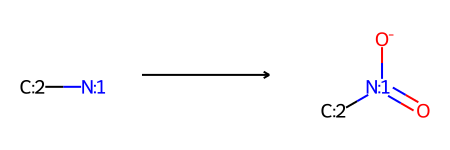

[C:2]-[NH;D2;+0:1]-[C:3]>>C-C(-C)(-C)-O-C(=O)-[N;H0;D3;+0:1](-[C:2])-[C:3]


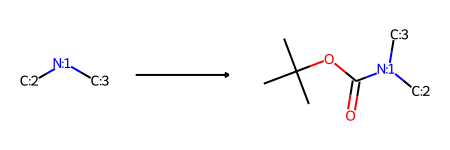

[C:5]-[O;H0;D2;+0:6]-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4]>>Cl-[S;H0;D4;+0:1](-[C;D1;H3:2])(=[O;D1;H0:3])=[O;D1;H0:4].[C:5]-[OH;D1;+0:6]


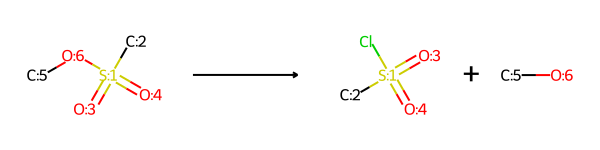

[OH;D1;+0:1]-[c:2]>>C-[O;H0;D2;+0:1]-[c:2]


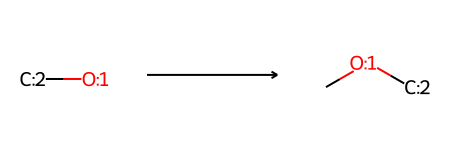

[C:2]-[NH2;D1;+0:1]>>C-C(-C)(-C)-O-C(=O)-[NH;D2;+0:1]-[C:2]


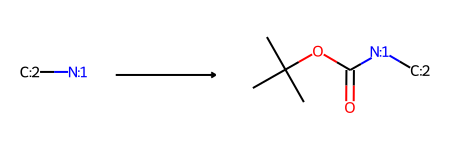

[O;D1;H0:3]=[C:2]-[OH;D1;+0:1]>>C-C(-C)(-C)-[O;H0;D2;+0:1]-[C:2]=[O;D1;H0:3]


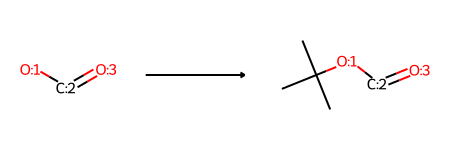

[OH;D1;+0:2]-[c:1]>>[c:1]-[O;H0;D2;+0:2]-C-c1:c:c:c:c:c:1


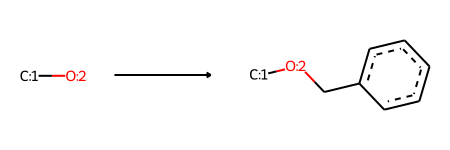

[O;D1;H0:2]=[C;H0;D3;+0:1](-[c:3])-[NH;D2;+0:4]-[c:5]>>Cl-[C;H0;D3;+0:1](=[O;D1;H0:2])-[c:3].[NH2;D1;+0:4]-[c:5]


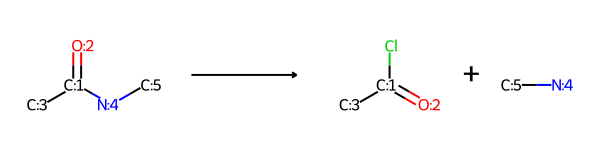

[CH3;D1;+0:1]-[O;H0;D2;+0:4]-[C:3]=[O;D1;H0:2]>>O-[CH3;D1;+0:1].[O;D1;H0:2]=[C:3]-[OH;D1;+0:4]


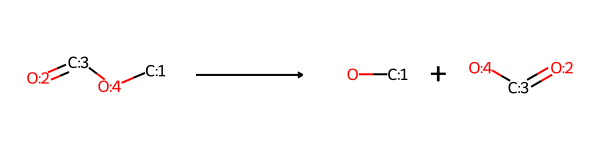

[#7;a:2]:[c;H0;D3;+0:1](:[#7;a:3])-[NH;D2;+0:4]-[c:5]>>Cl-[c;H0;D3;+0:1](:[#7;a:2]):[#7;a:3].[NH2;D1;+0:4]-[c:5]


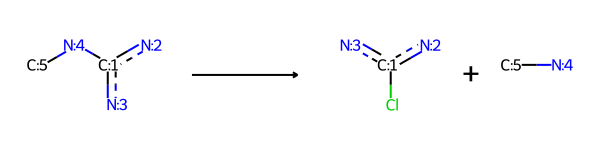

In [22]:
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

for rule in Top10Rule['Reaction_SMARTS']:
    print(rule)
    display(AllChem.ReactionFromSmarts(rule))

Then, all reaction with labeled data will be saved here and also with reaction template.

In [23]:
USPTO.to_json('USPTO_Labeled.json', orient='records')

In [24]:
Rule.to_json('USPTO_Rule.json', orient='records')

# Part 4: Run reaction template

First, import some RDKit library here.

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem
import rdkit
import random
rdkit.rdBase.DisableLog('rdApp.*')

Then load both reaction template and labeled reaction in previous step

In [26]:
with open('USPTO_Rule.json') as File:
    Rule = json.load(File)

In [27]:
with open('USPTO_Labeled.json') as File:
    Reaction = json.load(File)

Define some running reaction function

In [28]:
def RunReaction(Reaction, Reactants):
    Mols = [Chem.MolFromSmiles(mol) for mol in Reactants]
    [a.ClearProp('molAtomMapNumber') for mol in Mols for a in mol.GetAtoms()]
    try:
        Outcome = AllChem.ReactionFromSmarts(Reaction).RunReactants(Mols)
    except Exception:
        Outcome = []

    Output = []
    if Outcome:
        Outcome = Outcome[0]
        for mol in Outcome:
            try:
                Chem.SanitizeMol(mol)
                Output.append(Chem.MolToSmiles(mol))
            except Exception:
                continue
        
    return Output

In [29]:
def ClearMap(Mols):
    List_Mols = [Chem.MolFromSmiles(m) for m in Mols]
    [a.ClearProp('molAtomMapNumber') for mol in List_Mols for a in mol.GetAtoms()]
    return [Chem.MolToSmiles(m) for m in List_Mols]

Then define the main function to run in-scope filter function

In [30]:
def Inscope_Preprocessing(Reaction_Template, Reaction_Data):
    Reactants = Reaction_Data['Reactants']
    Products  = Reaction_Data['Products']
    Reaction  = Reaction_Template['Reaction_SMARTS']
    Outcome   = RunReaction(Reaction, Products)
    Reaction_Label = Reaction_Data['Reaction_Label']
    Rule_Label     = Reaction_Template['Rule_Index']
    if Outcome:
        if Reaction_Label == Rule_Label:
            Inscope_Data = {
                'Reactants':ClearMap(Reactants),
                'Products' :ClearMap(Products),
                'Inscope_Label': 1
            }
        else:
            Inscope_Data = {
                'Reactants':Outcome,
                'Products' :ClearMap(Products),
                'Inscope_Label':0
            }
    else:
        Inscope_Data = None
    return Inscope_Data

For the sake of memory and run time, only 10000 reaction will be run here in parallel. If you want to run full reaction, remove random.choices 

In [31]:
Inscope_Preprocessed = Parallel(n_jobs=-1, verbose=4)(delayed(Inscope_Preprocessing)(reactionTemplate, reaction) for reaction in Reaction for reactionTemplate in Rule)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 64 concurrent workers.
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 7616 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 45184 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 294784 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 563146 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 732624 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1051596 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 1243008 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1571020 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 1940416 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 2217892 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 2512384 tasks      | elapsed:   25.1s
[Parallel(n_jobs=-

Now remove None data out.

In [32]:
Inscope_Preprocessed = [x for x in Inscope_Preprocessed if x != None]

In [33]:
Inscope_Preprocessed = pd.DataFrame(Inscope_Preprocessed)
Inscope_Preprocessed

,Reactants,Products,Inscope_Label
0,"[BrC(Br)(Br)Br, CS(=O)(=O)OCCCO]",[CS(=O)(=O)OCCCBr],0
1,"[BrP(Br)Br, CS(=O)(=O)OCCCO]",[CS(=O)(=O)OCCCBr],0
2,"[CS(=O)(=O)OCCCO, O=C1CCC(=O)N1Br]",[CS(=O)(=O)OCCCBr],0
3,"[CS(=O)(=O)OCCCO, Br]",[CS(=O)(=O)OCCCBr],0
4,"[OCCCBr, CS(=O)(=O)Cl]",[CS(=O)(=O)OCCCBr],1
...,...,...,...
9506693,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506694,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506695,[NC[C@H]1CC[C@H](C(=O)N[C@@H](Cc2ccc(Br)cc2)C(...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506696,[NC[C@H]1CC[C@H](C(=O)N[C@@H](Cc2ccc(Br)cc2)C(...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0


In [34]:
Inscope_Preprocessed[Inscope_Preprocessed['Inscope_Label'] == 1]

,Reactants,Products,Inscope_Label
4,"[OCCCBr, CS(=O)(=O)Cl]",[CS(=O)(=O)OCCCBr],1
9,"[Cc1cc2c([N+](=O)[O-])cccc2c[n+]1[O-], O=P(Cl)...",[Cc1cc2c([N+](=O)[O-])cccc2c(Cl)n1],1
26,"[COc1cc2ccccc2cc1C(=O)O, O=S(Cl)Cl]",[COc1cc2ccccc2cc1C(=O)Cl],1
34,"[O=C1CCC(=O)N1Br, CN1c2ccccc2CC(=O)c2ccccc21]",[CN1c2ccccc2CC(=O)c2cc(Br)ccc21],1
72,"[Nc1ccc2nc3n(c2c1)CCC3, CC(=O)OC(C)=O]",[CC(=O)Nc1ccc2nc3n(c2c1)CCC3],1
...,...,...,...
9506299,[Cc1cc(C(=O)NC2CCC2)ccc1-c1ccc(C[C@H](NC(=O)[C...,[CCOC(=O)c1cc2ccc(NC(=O)[C@H](Cc3ccc(-c4ccc(C(...,1
9506387,[Cc1cc(C(=O)NC(C)C)ccc1-c1ccc(C[C@H](NC(=O)[C@...,[CNC(=O)C(F)(F)C(F)(F)c1nnc(-c2ccc(NC(=O)[C@H]...,1
9506471,[Cc1cc(C(=O)NC2CCC2)ccc1-c1ccc(C[C@H](NC(=O)[C...,[Cc1cc(C(=O)NC2CCC2)ccc1-c1ccc(C[C@H](NC(=O)[C...,1
9506566,[CNC(=O)c1ccc(-c2ccc(C[C@H](NC(=O)[C@@H]3CC[C@...,[CNC(=O)c1ccc(-c2ccc(C[C@H](NC(=O)[C@@H]3CC[C@...,1


In [35]:
Inscope_Preprocessed[Inscope_Preprocessed['Inscope_Label'] == 0]

,Reactants,Products,Inscope_Label
0,"[BrC(Br)(Br)Br, CS(=O)(=O)OCCCO]",[CS(=O)(=O)OCCCBr],0
1,"[BrP(Br)Br, CS(=O)(=O)OCCCO]",[CS(=O)(=O)OCCCBr],0
2,"[CS(=O)(=O)OCCCO, O=C1CCC(=O)N1Br]",[CS(=O)(=O)OCCCBr],0
3,"[CS(=O)(=O)OCCCO, Br]",[CS(=O)(=O)OCCCBr],0
5,"[CS(=O)(=O)OS(C)(=O)=O, OCCCBr]",[CS(=O)(=O)OCCCBr],0
...,...,...,...
9506693,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506694,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506695,[NC[C@H]1CC[C@H](C(=O)N[C@@H](Cc2ccc(Br)cc2)C(...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0
9506696,[NC[C@H]1CC[C@H](C(=O)N[C@@H](Cc2ccc(Br)cc2)C(...,[Cc1cc(C(=O)N[C@@H](C)C(F)(F)F)ccc1-c1ccc(C[C@...,0


And finally, save all data into .json file

In [36]:
Inscope_Preprocessed.to_json('USPTO_InscopeLabeled.json', orient='records')